In [32]:
!pip install scikit-image

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import morphology, io
from skimage.transform import rescale, resize, downscale_local_mean

import os

In [34]:
#Resize all images to 768x1024 and output to interim
#for filename in os.listdir('../data/raw/example_image'):
   #if 'DS' in filename:
        #continue
    #temp = plt.imread('../data/raw/example_image/'+filename)
    #temp_resized = resize(temp, (768, 1024),
                       #anti_aliasing=True)

    #new_filename = filename[:5]+"re_"+filename[5:]                 
    #io.imsave('../data/interim'+new_filename,temp_resized)


In [53]:
im = plt.imread('../data/raw/example_image/ISIC_0014212.jpg')
mask=plt.imread('../data/raw/example_segmentation/ISIC_0014212_segmentation.png')

52.2155260172103 %


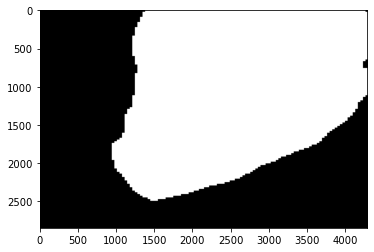

In [54]:
#Total size of the image
total = mask.shape[0] * mask.shape[1] 

#Size of mask only
area = np.sum(mask)

#As percentage
print(area/total*100, "%")

plt.imshow(mask, cmap='gray')

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]
6376677.0
6360749


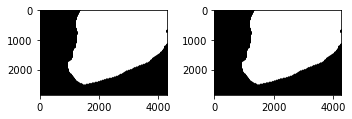

In [55]:
# Altea got the perimeter <3 <3


#Structural element, that we will use as a "brush" on our mask. The parameter is "brush size"
struct_el = morphology.disk(2)

print(struct_el)



# Use this "brush" to erode the image - eat away at the borders

mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify the new mask is smaller
new_area= np.sum(mask_eroded)

print(area)
print(new_area)

15928.0


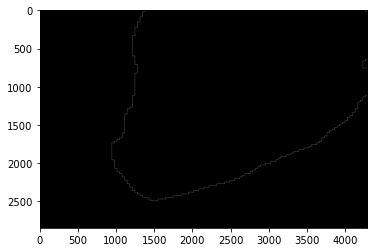

In [56]:
# Subtract the two masks from each other to get the border/perimeter

image_perimeter = mask - mask_eroded

plt.imshow(image_perimeter, cmap='gray') #Depending on the size of the "brush" it might be difficult to see on the screen

#What is the length of this perimeter = how many 1s? 
print(np.sum(image_perimeter))

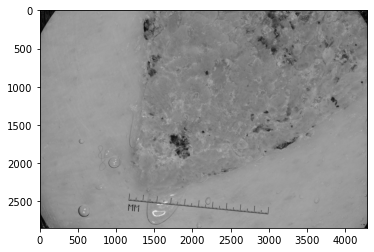

In [57]:
#Greyscaling
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(im)
plt.imshow(gray, cmap='gray')

In [58]:
#gray2 = gray[0:1500,:]
#plt.imshow(gray2, cmap='gray')

#mask2 = mask[0:1500,:]
#plt.imshow(mask2)

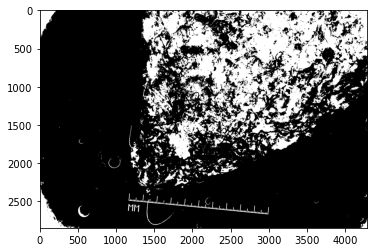

In [65]:
mymask = gray < np.quantile(gray,0.25) 
plt.imshow(mymask, cmap='gray')


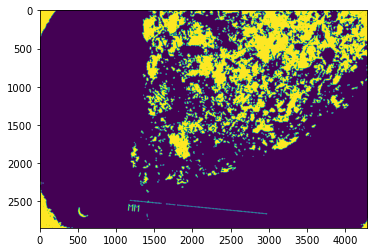

In [67]:
from skimage.morphology import opening

struct_el = morphology.disk(5)
opened = opening(mymask, struct_el)
plt.imshow(opened)